# A07 

## Q1 Singular Value Decomp

In [1]:
import numpy as np

In [2]:
def read(fname):
    vals = []
    with open(fname, 'rb') as fd:
        for line in fd:
            if not line.strip():
                continue
            s = list(map(float, line.strip().split()))
            vals.append(s)
            
    return np.array(vals)

In [3]:
A = read('./A.dat')
Cn = np.eye(A.shape[0]) - (1/A.shape[0])*np.ones((A.shape[0], A.shape[0]))
An = Cn.dot(A)

In [4]:
U, S, V = np.linalg.svd(A, full_matrices=False)
Un, Sn, Vn = np.linalg.svd(An, full_matrices=False)

In [5]:
def low_rank_approx(k, SVD=None, A=None):
    if not SVD:
        SVD = np.linalg.svd(A, full_matrices=False)
    U, S, V = SVD
    Uk = U[:,0:k]
    Sk = S[0:k]
    Vk = V[0:k,:]
    Ak = Uk * Sk @ Vk
    return Ak

### A

In [6]:
for k in range(1,11):
    Ak = low_rank_approx(k, (U,S,V))
    L2 = np.linalg.norm(A-Ak, ord=2)
    print('k={}'.format(k), (L2))

k=1 1862.60013201
k=2 1525.70670692
k=3 1171.85951346
k=4 925.121164757
k=5 827.812113017
k=6 815.225383344
k=7 639.611983963
k=8 526.857836187
k=9 327.039734628
k=10 227.252047919


### B

In [7]:
for k in range(1,41):
    Ak = low_rank_approx(k, (U,S,V))
    L2 = np.linalg.norm(A-Ak, ord=2)
    if np.linalg.norm(A, ord=2)*.1 > L2:
        print('k={} (10% A:{}, Ak:{})'.format(k, np.linalg.norm(A, ord=2)*.1, L2))
        break

k=8 (10% A:636.6474948247128, Ak:526.8578361869166)


In [8]:
for k in range(1,41):
    Ak = low_rank_approx(k, (Un,Sn,Vn))
    L2 = np.linalg.norm(An-Ak, ord=2)
    if np.linalg.norm(An, ord=2)*.1 > L2:
        print('k={} (10% A:{}, Ak:{})'.format(k, np.linalg.norm(An, ord=2)*.1, L2))
        break

k=11 (10% A:203.5764567208041, Ak:203.11004107063303)


### C

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.style.use('seaborn')

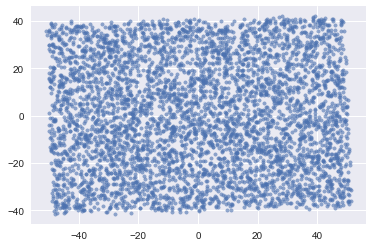

In [10]:
plt.scatter(An.dot(Vn[0,:]), An.dot(Vn[1,:]), marker='.', alpha=.6)
plt.show()

## Q2

In [19]:
def freq_directions(A, l): # can be adapted to a streaming setting.
    B = np.zeros((2*l, A.shape[1]))
    for a in A:
        for i, b in enumerate(B):
            if np.all(b == 0):
                B[i] = a
                break
                
        if not np.all(B == 0):
            U, S, V = np.linalg.svd(B, full_matrices=False)
            delta = S[l]**2
            Sp = np.diag(np.hstack([(S[:l]**2-delta)**.5, np.zeros((l))]))
            B = Sp @ V
            
    return B     

### A

In [20]:
err_bound = np.linalg.norm(A)**2/10
print(err_bound)

for l in range(1,20):
    B = freq_directions(A, l)
    err = np.linalg.norm(A.T @ A - B.T @ B, ord=2)
    if err <= err_bound:
        print('l={}  err={}'.format(l, err))
        break

5091577.32179
l=3  err=3431031.62792539


In [21]:
np.linalg.norm(A)**2/2

25457886.608933121

In [22]:
err_bound = np.linalg.norm(A - low_rank_approx(k=2, A=A))**2/10
print(err_bound)

for l in range(1,20):
    B = freq_directions(A, l)
    err = np.linalg.norm(A.T @ A - B.T @ B, ord=2)
    if err <= err_bound:
        print('l={}  err={}'.format(l, err))
        break

691449.069943
l=8  err=501924.88326510735


### B

In [23]:
def rand_proj(A,l):
    n, d = A.shape
    S = np.random.normal(scale=np.sqrt(l)/np.sqrt(n), size=(l,n))
    #S = u/np.linalg.norm(u, axis=0)
    B = S @ A
    return B

In [25]:
err_bound = np.linalg.norm(A)**2/10
print(err_bound)

ls = []
errs = []
for t in range(200):
    for l in range(25,100):
        B = rand_proj(A, l)
        err = np.linalg.norm(A.T @ A - B.T @ B, ord=2)
        if err <= err_bound:
            ls.append(l)
            errs.append(err)
            break
            
print(np.mean(ls))
print(np.median(ls))


5091577.32179
63.405
64.0


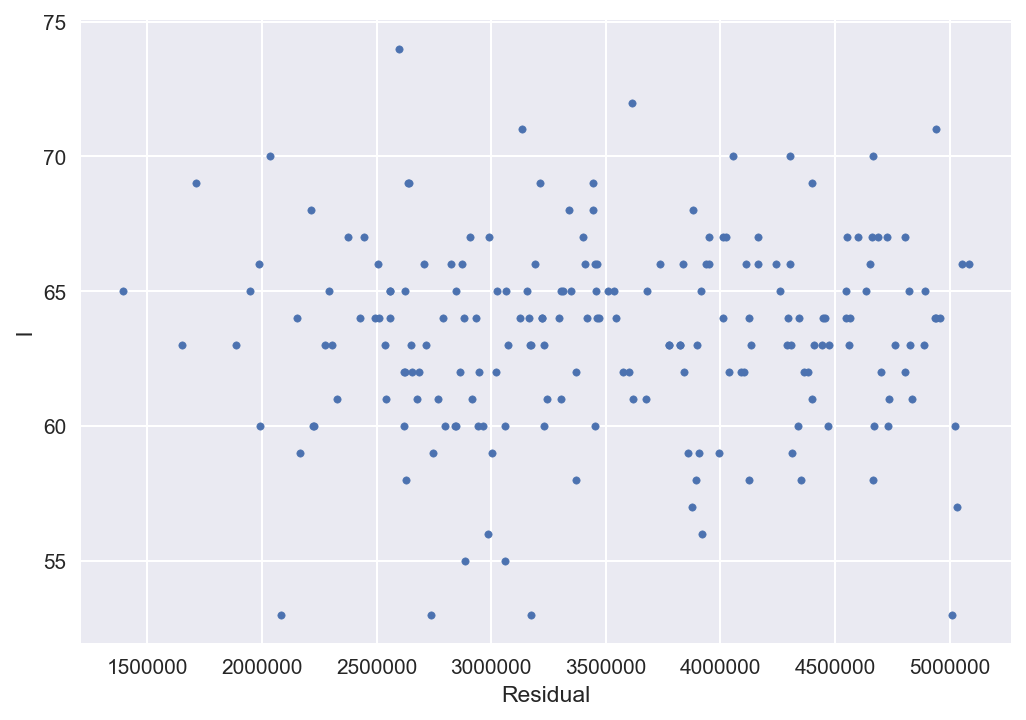

In [28]:
plt.scatter(errs, ls, marker='.')
plt.ylabel('l')
plt.xlabel('Residual')
plt.show()